In [2]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7781,7782,15759184,Russell,705,France,Male,34,7,117715.84,1,1,0,2498.67,0
6465,6466,15606855,Wang,730,Spain,Male,26,6,0.00,2,1,1,185808.70,0
8033,8034,15576526,Steele,850,Spain,Male,36,6,0.00,2,0,1,41291.05,0
3808,3809,15698117,Jerger,701,Germany,Male,41,0,150844.94,1,0,1,127623.36,0
8767,8768,15585466,Russo,552,France,Male,29,10,0.00,2,1,0,12186.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [6]:
def gender(g):
    if g=="Female":
        g=0
    else:
        g=1
    return g

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=df['Gender'].apply(gender)

In [8]:
print(df['Geography'].unique())
print(df['Gender'].unique()) # 0 is female 1 is male

[0 2 1]
[0 1]


In [9]:
df.shape

(10000, 14)

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
print(df['Exited'].unique())

[1 0]


In [13]:
x=df.drop(['RowNumber','CustomerId','Surname','CreditScore','Exited'],axis=1)
y=df['Exited']

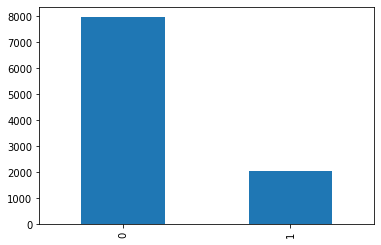

In [14]:
y.value_counts().plot.bar()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(x.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


In [18]:
#opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = "SGD", loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(patience=5)
model.fit(X_train, y_train,validation_split=0.2,epochs = 100,callbacks=[es])

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 106us/step - loss: 0.5490 - accuracy: 0.7914 - val_loss: 0.4892 - val_accuracy: 0.8037
Epoch 2/100
6400/6400 [==============================] - 0s 67us/step - loss: 0.4840 - accuracy: 0.7969 - val_loss: 0.4581 - val_accuracy: 0.8031
Epoch 3/100
6400/6400 [==============================] - 0s 66us/step - loss: 0.4624 - accuracy: 0.7973 - val_loss: 0.4408 - val_accuracy: 0.8031
Epoch 4/100
6400/6400 [==============================] - 0s 62us/step - loss: 0.4491 - accuracy: 0.8003 - val_loss: 0.4296 - val_accuracy: 0.8069
Epoch 5/100
6400/6400 [==============================] - 0s 67us/step - loss: 0.4401 - accuracy: 0.8045 - val_loss: 0.4221 - val_accuracy: 0.8131
Epoch 6/100
6400/6400 [==============================] - 0s 70us/step - loss: 0.4336 - accuracy: 0.8072 - val_loss: 0.4167 - val_accuracy: 0.8131
Epoch 7/100
6400/6400 [==============================] - 0s 69us/step - los

In [26]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy = ",(cm[0,0]+cm[1,1])/(cm.sum()))

Accuracy =  0.8665
